## EAS 503 Homework 3 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - October 31, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 2 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


In [3]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

######Reading the file#####


crime_data = pd.read_csv('C:\\Users\\Alekya Kumar\\Desktop\\Data Sciences - Sem 1\\Python and DB\\chicago_crime_data.csv')
crime_data_df = pd.DataFrame(crime_data)
#print(crime_data_df)
crime_data_df

,Crime_ID,Case Number,Date,Block,IUCR,Primary Type ID,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10496347,HZ237390,4/23/2016 16:55,001XX N PARKSIDE AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29.0,25,14,1138578.0,1900413.0,2016,4/30/2016 15:51,41.882858,-87.766599,"(41.88285803, -87.766599362)"
1,10496348,HZ237355,4/23/2016 14:00,0000X E RIVERWALK S,820,32,$500 AND UNDER,SIDEWALK,False,False,...,42.0,32,6,1176778.0,1902518.0,2016,4/30/2016 15:51,41.887856,-87.626264,"(41.887856357, -87.626264274)"
2,10496349,HZ237341,4/23/2016 16:10,003XX W 35TH ST,495,3,AGGRAVATED OF A SENIOR CITIZEN,SPORTS ARENA/STADIUM,True,False,...,11.0,34,04B,1174431.0,1881739.0,2016,4/30/2016 15:51,41.830890,-87.635503,"(41.830890037, -87.635503335)"
3,10496350,HZ237330,4/23/2016 13:30,040XX N MAJOR AVE,031A,29,ARMED: HANDGUN,ALLEY,False,False,...,38.0,15,3,1137626.0,1926291.0,2016,4/30/2016 15:51,41.953887,-87.769470,"(41.953887423, -87.76947041)"
4,10496351,HZ237402,4/23/2016 16:45,084XX S DREXEL AVE,2820,25,TELEPHONE THREAT,RESIDENCE,False,True,...,8.0,44,26,1183692.0,1849271.0,2016,4/30/2016 15:51,41.741584,-87.602537,"(41.741583562, -87.602537135)"
5,10496352,HZ237376,4/23/2016 16:39,018XX S ST LOUIS AVE,820,32,$500 AND UNDER,APARTMENT,False,True,...,24.0,29,6,1153327.0,1890818.0,2016,4/30/2016 15:51,41.856248,-87.712695,"(41.856248253, -87.712694737)"
6,10496353,HZ237358,4/23/2016 7:00,002XX E HURON ST,890,32,FROM BUILDING,HOSPITAL BUILDING/GROUNDS,False,False,...,42.0,8,6,1178046.0,1905133.0,2016,4/30/2016 15:51,41.895003,-87.621528,"(41.895003278, -87.62152816)"
7,10496354,HZ237396,4/23/2016 12:00,023XX S TRUMBULL AVE,2825,25,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,22.0,30,26,1153734.0,1888259.0,2016,4/30/2016 15:51,41.849218,-87.711269,"(41.849217975, -87.711268873)"
8,10496355,HZ237254,4/23/2016 1:00,070XX S JEFFERY BLVD,2825,25,HARASSMENT BY TELEPHONE,BAR OR TAVERN,False,True,...,5.0,43,26,1190765.0,1858575.0,2016,4/30/2016 15:51,41.766947,-87.576322,"(41.766946791, -87.57632241)"
9,10496356,HZ237248,4/23/2016 15:10,095XX S COMMERCIAL AVE,1320,7,TO VEHICLE,STREET,False,False,...,10.0,51,14,1197803.0,1842283.0,2016,4/30/2016 15:51,41.722067,-87.551069,"(41.722067458, -87.55106874)"


In [41]:
##########Sort the crime data file by crime ID###########
primary_type = pd.read_csv('C:\\Users\\Alekya Kumar\\Desktop\\New folder\\DB\\primary_type_id.csv')
primary_type_df = pd.DataFrame(primary_type)
#print(primary_type_df)
primary_type_df

,Primary Type,Primary Type ID
0,ARSON,1
1,ASSAULT,2
2,BATTERY,3
3,BURGLARY,4
4,CONCEALED CARRY LICENSE VIOLATION,5
5,CRIM SEXUAL ASSAULT,6
6,CRIMINAL DAMAGE,7
7,CRIMINAL TRESPASS,8
8,DECEPTIVE PRACTICE,9
9,GAMBLING,10


In [42]:
#####nd merge the two files by Primary Type ID variable######

crime_data_sorted = crime_data.sort_values(by ='Crime_ID')
merged_data = pd.merge(crime_data_sorted, primary_type_df, on = 'Primary Type ID')
merged_data
#merged_data.groupby('Primary Type ID').count()
crime_type = merged_data.groupby('Primary Type')['Primary Type'].count()
crime_type_df = pd.DataFrame(crime_type)
crime_type_df
high_freq_crime = crime_type_df[crime_type_df['Primary Type'] > 10000]
high_freq_crime



,Primary Type
Primary Type,
ASSAULT,31143
BATTERY,81995
BURGLARY,22524
CRIMINAL DAMAGE,49746
CRIMINAL TRESPASS,10747
DECEPTIVE PRACTICE,28994
MOTOR VEHICLE THEFT,18505
NARCOTICS,20184
OTHER OFFENSE,28597


In [43]:
####Identify the crime types that have a frequency >10,000 and list them as High Frequency Crime Types#####

import datetime
merged_data_df = pd.DataFrame(merged_data)
merged_data_df
new_data = merged_data_df[(merged_data_df['Primary Type'] == 'ASSAULT') | (merged_data_df['Primary Type'] == 'BATTERY') | (merged_data_df['Primary Type'] == 'BURGLARY') | (merged_data_df['Primary Type'] == 'CRIMINAL DAMAGE') | (merged_data_df['Primary Type'] == 'CRIMINAL TRESPASS') | (merged_data_df['Primary Type'] == 'DECEPTIVE PRACTICE') | (merged_data_df['Primary Type'] == 'MOTOR VEHICLE THEFT') | (merged_data_df['Primary Type'] == 'NARCOTICS') | (merged_data_df['Primary Type'] == 'OTHER OFFENSE') | (merged_data_df['Primary Type'] == 'ROBBERY') | (merged_data_df['Primary Type'] == 'THEFT') ]
new_data
                      

,Crime_ID,Case Number,Date,Block,IUCR,Primary Type ID,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary Type
1235,10364665,HZ100012,1/1/2016 0:01,014XX S AVERS AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29,14,1150945.0,1892794.0,2016,1/10/2016 8:46,41.861718,-87.721386,"(41.861717546, -87.721386272)",CRIMINAL DAMAGE
1236,10364673,HZ100011,1/1/2016 0:20,021XX N CALIFORNIA AVE,1320,7,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,22,14,1157345.0,1914452.0,2016,1/10/2016 8:46,41.921021,-87.697304,"(41.921021491, -87.69730355)",CRIMINAL DAMAGE
1237,10364678,HZ100055,1/1/2016 1:20,005XX N LOCKWOOD AVE,1310,7,TO PROPERTY,APARTMENT,False,True,...,25,14,1140947.0,1902786.0,2016,1/10/2016 8:46,41.889327,-87.757842,"(41.889326577, -87.757841738)",CRIMINAL DAMAGE
1238,10364694,HZ100021,1/1/2016 0:35,085XX W BRYN MAWR AVE,1310,7,TO PROPERTY,HOTEL/MOTEL,True,False,...,76,14,1118477.0,1936072.0,2016,1/10/2016 8:46,41.981052,-87.839659,"(41.981051826, -87.839658835)",CRIMINAL DAMAGE
1239,10364705,HZ100083,1/1/2016 1:37,072XX S SACRAMENTO AVE,1310,7,TO PROPERTY,RESIDENCE,False,False,...,66,14,1157623.0,1856549.0,2016,1/10/2016 8:46,41.762123,-87.697856,"(41.762123352, -87.697856228)",CRIMINAL DAMAGE
1240,10364723,HZ100051,1/1/2016 0:01,020XX W WASHINGTON BLVD,1310,7,TO PROPERTY,RESIDENCE,False,False,...,28,14,1162793.0,1900685.0,2016,1/10/2016 8:46,41.883131,-87.677673,"(41.883131184, -87.677672969)",CRIMINAL DAMAGE
1241,10364724,HZ100086,1/1/2016 1:47,015XX N WESTERN AVE,1320,7,TO VEHICLE,STREET,False,False,...,24,14,1160132.0,1910073.0,2016,1/10/2016 8:46,41.908948,-87.687185,"(41.908948011, -87.687184685)",CRIMINAL DAMAGE
1242,10364754,HZ100025,1/1/2016 0:05,072XX S RHODES AVE,1310,7,TO PROPERTY,RESIDENCE,False,False,...,69,14,1181159.0,1857139.0,2016,1/10/2016 8:46,41.763233,-87.611576,"(41.763232864, -87.611576015)",CRIMINAL DAMAGE
1243,10364767,HZ100113,1/1/2016 2:05,013XX S KARLOV AVE,1310,7,TO PROPERTY,APARTMENT,False,False,...,29,14,1149263.0,1893553.0,2016,1/10/2016 8:46,41.863833,-87.727541,"(41.863833067, -87.727540998)",CRIMINAL DAMAGE
1244,10364789,HZ100152,1/1/2016 2:00,132XX S DR MARTIN LUTHER KING JR DR,1310,7,TO PROPERTY,RESIDENCE,False,False,...,54,14,1181061.0,1817544.0,2016,1/10/2016 8:46,41.654581,-87.613149,"(41.654581281, -87.613148937)",CRIMINAL DAMAGE


In [44]:
########Provide a timeseries plot for all High Frequency Crime Types. 
##For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). 
###Use the series.plot method in Pandas for Series objects.
import datetime
import dateutil
from dateutil import parser

merged_data_df = pd.DataFrame(merged_data)
merged_data_df
new_data = merged_data_df[(merged_data_df['Primary Type'] == 'ASSAULT') | (merged_data_df['Primary Type'] == 'BATTERY') | (merged_data_df['Primary Type'] == 'BURGLARY') | (merged_data_df['Primary Type'] == 'CRIMINAL DAMAGE') | (merged_data_df['Primary Type'] == 'CRIMINAL TRESPASS') | (merged_data_df['Primary Type'] == 'DECEPTIVE PRACTICE') | (merged_data_df['Primary Type'] == 'MOTOR VEHICLE THEFT') | (merged_data_df['Primary Type'] == 'NARCOTICS') | (merged_data_df['Primary Type'] == 'OTHER OFFENSE') | (merged_data_df['Primary Type'] == 'ROBBERY') | (merged_data_df['Primary Type'] == 'THEFT') ]
new_data

new_data['Date'] = pd.to_datetime(new_data['Date'],format = '%m/%d/%Y %H:%M')
new_data['Date'] = new_data['Date'].dt.strftime('%Y/%m')
new_data


count_by_date = new_data.pivot_table('Primary Type ID',columns = 'Primary Type', index ='Date',aggfunc=np.size)
count_by_date


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Primary Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT
Date,,,,,,,,,,,
2016/01,1225,3727,1182,2373,462,1488,985,1143,1338,1041,4484
2016/02,1241,3497,843,2089,438,1452,837,1296,1313,702,4002
2016/03,1640,4274,1048,2538,499,1509,783,1468,1571,785,4658
2016/04,1508,4027,946,2392,505,1478,758,1447,1415,771,4589
2016/05,1786,4714,1106,2733,586,1398,824,1390,1572,960,5042
2016/06,1816,4849,1080,2641,590,1615,935,1270,1499,905,5346
2016/07,1711,4685,1349,2987,568,1455,1039,1241,1507,1127,5817
2016/08,1761,4587,1372,2973,578,1619,1026,857,1502,1238,5989
2016/09,1693,4314,1372,2846,579,1534,983,887,1347,1028,5729


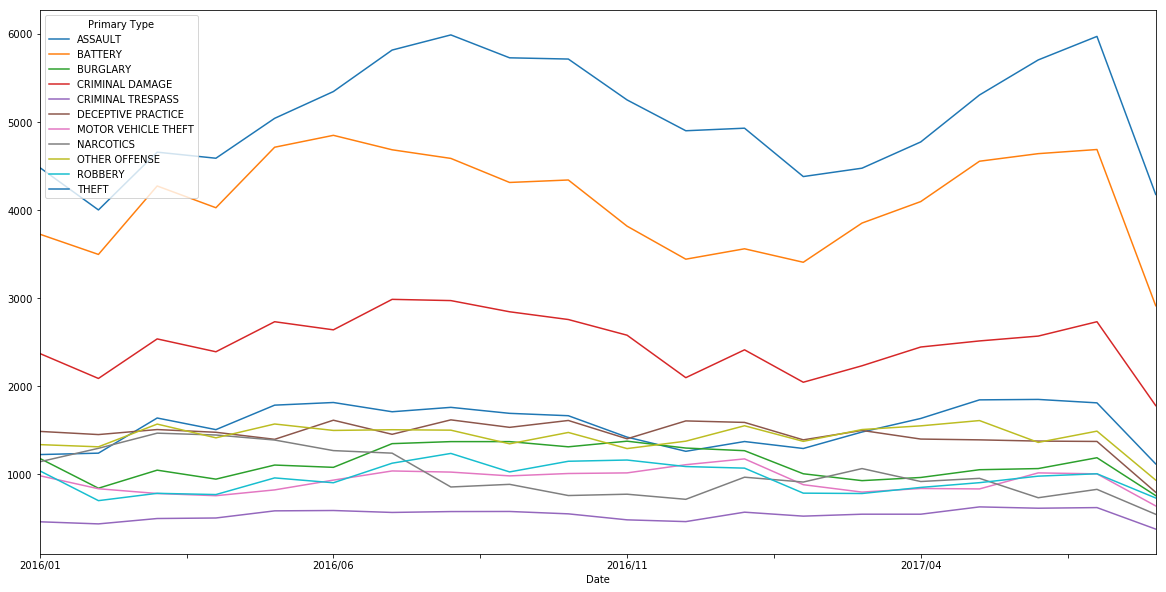

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
count_by_date.plot(ax=ax)
plt.show()

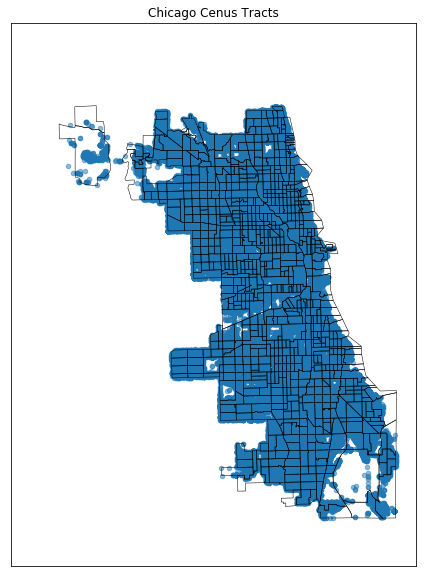

In [46]:
######## plot all the crimes that come under High Frequency Crime Types on a map of Chicago#########
new_data.sort_values(by=['Date'],ascending = True)
new_data['Latitude'].fillna(method="ffill")
new_data['Longitude'].fillna(method="ffill")

#new_data
lons = new_data['Longitude'].tolist()
lats = new_data['Latitude'].tolist()

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
#lons = [-87.6,-87.7]
#lats = [41.65,41.75]
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()

### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

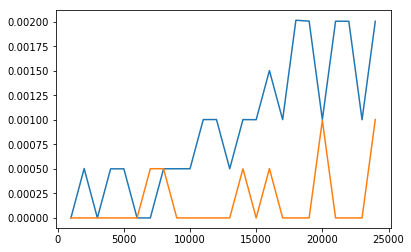

In [5]:
#Enter your solution here

import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 


#B = np.random.randint(1000, 25000, 1000)

times_np_sort = []
times_norm_sort = []
indices = []
def Sorting():
    for N in range(1000,25000,1000):
    #print(max(B))
    #print(B)
    ###Using Numpy sort##
        B = np.arange(N)
        s_np_sort = time.time()
        np.sort(B)
        e_np_sort = time.time()
        #print("Time taken using Numpy sort",e_np_sort - s_np_sort)
        time_np_sort = e_np_sort-s_np_sort
        times_np_sort.append(time_np_sort)
       
        
        
        ###Using normal Sort####
        s_norm_sort = time.time()
        sorted(B)
        e_norm_sort = time.time()
        #print("Time taken using normal sort",e_norm_sort - s_norm_sort)
        time_norm_sort = e_norm_sort-s_norm_sort
        times_norm_sort.append(time_norm_sort)
        indices.append(N)
        
    #print(times_np_sort)
    #print(times_norm_sort)
    #print(indices)
    plt.plot(indices,times_norm_sort)
    plt.plot(indices,times_np_sort)   
    
    
Sorting()



# The plot shows that Sorting using the normal sort method in built in python takes a longer time to sort than the Numpy sort algorithm. In some points , the time taken for numpy sort is high, but the normal sort algorith keeps increasing 

#   

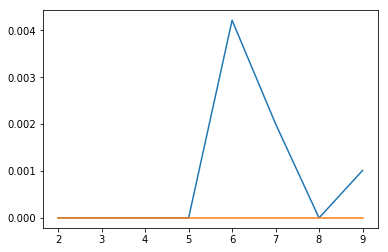

In [13]:
import random
import time
import copy
times_np_det = [] 
times_norm_det = []
index = []
def Determinant(): 
    for L in range(2,10):
        #print (L)
        A_one = np.arange(L*L).reshape(L,L)
        #print(A_one)
    ##########Determinant using numpy#########
        #print('Determinant using Numpy for a N*N matrix is',np.linalg.det(A_one))
        s_np_det = time.time()
        det_np = np.linalg.det(A_one)
        e_np_det = time.time()
        time_np_det = e_np_det - s_np_det
        times_np_det.append(time_np_det)
        #############Using traditional method######
        s_norm_det = time.time()
        if A_one.shape == 2:
            det_norm = (A_one[0]*A_one[3] - A_one[1]*A_one[2])
            #print(det_norm)

        else:
            #temp_A=copy.copy(A_one)
            #del temp_A[0]
            #for b in list(range(len(temp_A))):
                #del temp_A[b]
                #for i in range(A_one.shape[0]):
                    #det_norm += A[0][i] * (-1)**(2+i) * det_norm()
            det_norm = sum([(-1)**i * A_one[i, 0] * np.linalg.det(np.delete(np.delete(A_one, 0, 1), i, 0)) for i in range(A_one.shape[0])]) if A_one.shape != (1, 1) else A_one[0, 0]
  

        e_norm_det = time.time()
        index.append(L)
        #print(index)
        time_norm_det = e_norm_det - s_norm_det
        times_norm_det.append(time_norm_det)

    plt.plot(index,times_norm_det)
    plt.plot(index,times_np_det)
    plt.show()
Determinant()

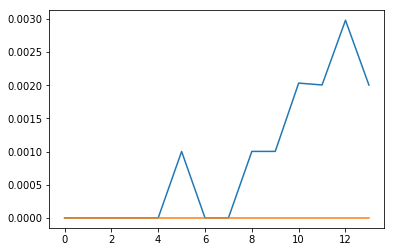

In [3]:
import random
times_np_mul = []
times_norm_mul = []
index = []

def mul_Matrix():
    for M in range(random.randint(10,50)):
        #M = np.random.randint(1,20)
        #print(M)
        A_two = np.arange(M*M).reshape(M,M)
        

    ########Using Numpy###########
        s_np_mul = time.time()
        np_mul = np.dot(A_two,A_two)
        e_np_mul = time.time()
        mul_time_np = e_np_mul - s_np_mul
        times_np_mul.append(mul_time_np)
        #print("Time taken to compute", M,"*",M, "matrix using Numpy is",mul_time_np)

        #######Using traditional method#########
        result = np.zeros((M,M))
        #print(result)
        s_norm_mul = time.time()
        for i in range(len(A_two)):
            for j in range(len(A_two[0])):
                for k in range(len(A_two)):
                    result[i][j] += A_two[i][k] * A_two[k][j]
        e_norm_mul = time.time()
        mul_time_norm = e_norm_mul - s_norm_mul
        #print("Time taken to compute", M,"*",M, "matrix using traditional method is",mul_time_norm)
        times_norm_mul.append(mul_time_norm)
        index.append(M)

        #print(times_norm_mul)
        #print(times_np_mul)
        #print(index)
    plt.plot(index,times_norm_mul)
    plt.plot(index,times_np_mul)   

mul_Matrix()

# The plot shows that multiplication using numpy's function takes negligible amount of time whereas the multiplication using normal or traditional method , the time taken is less for matrices of low dimension. As the dimension increases,the time taken to compute also increases. 